In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_items = pd.read_csv('csv/order_items.csv', sep=';')

In [5]:
df_interact = df_items.copy(deep=True)
display(df_interact.head())

# Filter hanya untuk item produk (bukan shipping, tax, dsb)
df_interact = df_interact[df_interact["order_item_type"] == "line_item"]

# Hitung jumlah interaksi produk
df_interact = df_interact["order_item_name"].value_counts().reset_index()
df_interact.columns = ["product_name", "interaction_count"]
display(df_interact.head(50))

# Ambil 10 produk teratas
top_products = df_interact.head(10)

,order_item_id,order_item_name,order_item_type,order_id
0,15,Atasan Basic Wanita,line_item,1036
1,16,Free shipping,shipping,1036
2,17,This Is April Atasan Kemeja Lengan Panjang,line_item,1037
3,18,Free shipping,shipping,1037
4,19,AMOENE [MADE] Long Strap Dress Navy,line_item,1038


,product_name,interaction_count
0,Atasan Knit Wanita,8
1,AMOENE [MADE] Long Strap Dress Navy,7
2,This Is April Atasan Kemeja Lengan Panjang,7
3,This Is April Rok Midi Crochet Wanita,5
4,Hosofshopaholic - Darel Skirt,5
5,Sora Plaid Blazer Lengan Panjang / Blazer Casu...,5
6,Midi Dress Tropical Flowers,5
7,Celana Cargo Pendek Anak Laki-Laki Bahan Dusky...,5
8,Lafiye Skiv Rou Scarf,4
9,HEELSADDICT Mini Amber Laser Cut Sling Bag,4


In [ ]:
# df_interact.to_csv("interact_chart.csv", index=False)
# df = pd.read_csv("interact_chart.csv")
# df

,product_name,interaction_count
0,Atasan Knit Wanita,8
1,AMOENE [MADE] Long Strap Dress Navy,7
2,This Is April Atasan Kemeja Lengan Panjang,7
3,This Is April Rok Midi Crochet Wanita,5
4,Hosofshopaholic - Darel Skirt,5
...,...,...
76,Dress Anak Perempuan Princess,1
77,Jaket Puffer Polos Anak Laki laki dan Perempuan,1
78,Gaun Pesta Anak Perempuan Premium Dress,1
79,Modern,1


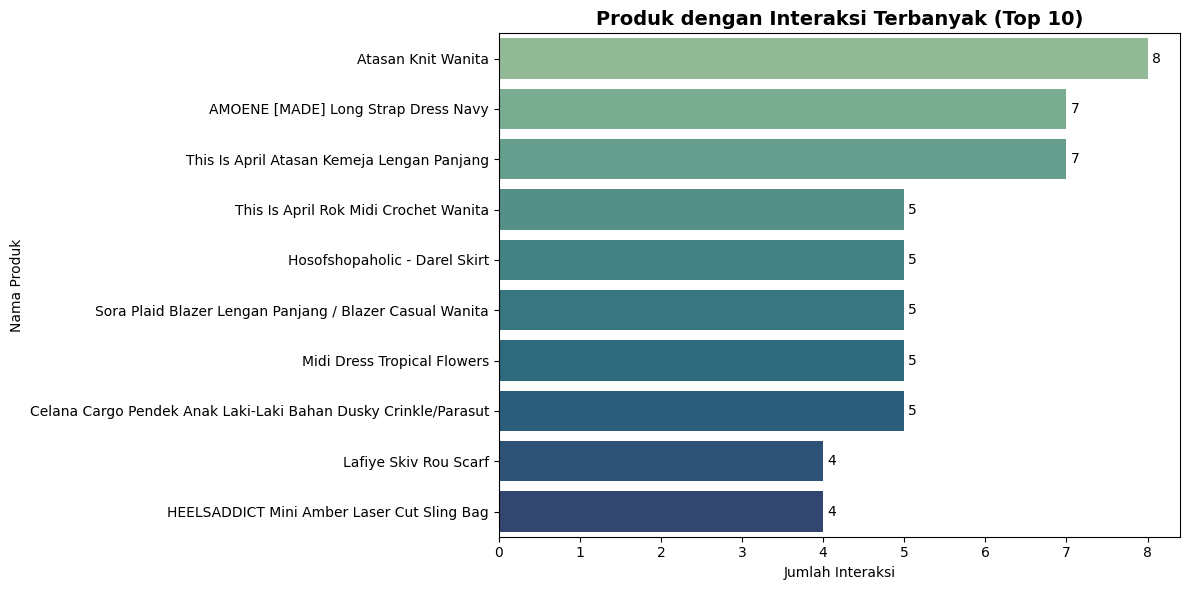

In [7]:
# Visualisasi bar chart horizontal
fig, ax = plt.subplots(figsize=(12, 6))
plot = sns.barplot(
    data=top_products,
    x="interaction_count",
    y="product_name",
    palette="crest",
    hue="product_name",
    legend=False,
    ax=ax
)

for bar in plot.containers:
    plot.bar_label(bar, fmt='%d', label_type='edge', padding=3)

ax.set_title("Produk dengan Interaksi Terbanyak (Top 10)", fontsize=14, fontweight="bold")
ax.set_xlabel("Jumlah Interaksi")
ax.set_ylabel("Nama Produk")
plt.tight_layout()